# Assignment B

first we load all our datasets

In [32]:
import pandasql as psql
import numpy as np 
import pandas as pd 
import matplotlib as mp

%cd /Users/imzy/Desktop/Python/WHO
! pwd

In [6]:
#Importing Datasets

country_codes= pd.read_csv("country_codes.csv",skipinitialspace=True)

display(country_codes.head(5)) 


,country,name
0,1010,Algeria
1,1020,Angola
2,1025,Benin
3,1030,Botswana
4,1035,Burkina Faso


In [7]:
population= pd.read_csv("pop.csv",skipinitialspace=True)

display(population.head(5)) 

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
0,1060,NaN,NaN,1980,1,7,137100.0,3400.0,15800.0,NaN,...,NaN,5300.0,NaN,2900.0,NaN,NaN,NaN,NaN,6500.0,5000.0
1,1060,NaN,NaN,1980,2,7,159000.0,4000.0,18400.0,NaN,...,NaN,6200.0,NaN,3400.0,NaN,NaN,NaN,NaN,7500.0,6000.0
2,1125,NaN,NaN,1955,1,2,5051500.0,150300.0,543400.0,NaN,...,110200.0,51100.0,41600.0,14300.0,11800.0,25300.0,NaN,NaN,0.0,253329.0
3,1125,NaN,NaN,1955,2,2,5049400.0,145200.0,551000.0,NaN,...,122100.0,51100.0,50700.0,15800.0,18000.0,28500.0,NaN,NaN,0.0,237901.0
4,1125,NaN,NaN,1956,1,2,5353700.0,158700.0,576600.0,NaN,...,116900.0,54100.0,44000.0,14900.0,12400.0,26600.0,NaN,NaN,0.0,250022.0


In [10]:
death1= pd.read_csv("Morticd10_part1.csv",skipinitialspace=True)

display(death1.head(5)) 

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2001,101,1000,1,7,8,332,...,95.0,NaN,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN
1,1400,NaN,NaN,2001,101,1000,2,7,8,222,...,112.0,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN
2,1400,NaN,NaN,2001,101,1001,1,7,8,24,...,5.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1400,NaN,NaN,2001,101,1001,2,7,8,14,...,6.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1400,NaN,NaN,2001,101,1002,1,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [12]:
death2= pd.read_csv("Morticd10_part2.csv",skipinitialspace=True)

display(death2.head(5)) 

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2005,101,1000,1,7,8,386,...,136.0,NaN,NaN,NaN,NaN,0.0,10.0,NaN,NaN,NaN
1,1400,NaN,NaN,2005,101,1000,2,7,8,287,...,163.0,NaN,NaN,NaN,NaN,0.0,6.0,NaN,NaN,NaN
2,1400,NaN,NaN,2005,101,1001,1,7,8,29,...,13.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1400,NaN,NaN,2005,101,1001,2,7,8,21,...,16.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1400,NaN,NaN,2005,101,1002,1,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


## question 1:
What was the population and the total number of deaths (from all causes, all ages) in 2010 for:
o Iceland
o Italy
o New Zealand

Total number of population for each country for 2010 is shown below 

In [25]:
# First we calculate total population of each country 
from pandasql import PandaSQL
pdsql = PandaSQL()
temp = pdsql('select Country, sum(Pop1) as total_population from population where Country in ("4290","4180","5150") and Year="2010" group by 1 ;')
total_populations=pdsql('select b.name, a.* from temp a left outer join country_codes b on a.Country = b.country;')
display(total_populations) 

,name,Country,total_population
0,Italy,4180,60483386.0
1,Sweden,4290,9378126.0
2,New Zealand,5150,4367360.0


total number of deaths forr all causes and all ages during 2010 for each country is 

In [29]:
# getting total deaths for each country 

total_death=pdsql("select Country, sum(Deaths1) as total_deaths from death2 where country in('4180','4290','5150') and Year ='2010' group by 1;")
total_population_death = pdsql("select a.*, b.total_deaths from total_populations a left outer join total_death b on a.Country = b.Country;")
display(total_population_death)

,name,Country,total_population,total_deaths
0,Italy,4180,60483386.0,1169230
1,Sweden,4290,9378126.0,181038
2,New Zealand,5150,4367360.0,57298


## Question 2. What was the distribution of deaths (all causes, all years) by age group in Italy? 
o Visualise the results using a histogram.

In [51]:
# We will take the Year and Death 1 columns for both datasets, union all then histogram

italy1 = pdsql('select Year, Deaths1 ,Cause from death1 where country= "4180";')
italy2 = pdsql('select Year, Deaths1, Cause from death2 where country= "4180";')




In [76]:
italy_dath = pdsql('select * from italy1 UNION ALL select * from italy2 order by Year desc;')

,Year,Deaths1,Cause
0,2015,1,A020
1,2015,4,A021
2,2015,2,A021
3,2015,1,A022
4,2015,1,A029
5,2015,3,A029
6,2015,1,A045
7,2015,295,A047
8,2015,450,A047
9,2015,33,A048


In [53]:
italy_death = pdsql('select sum(Deaths1) as total_death,  Year from italy_dath group by 2;')
display(italy_death)

,total_death,Year
0,1177794,2003
1,1090102,2004
2,1136656,2005
3,1117228,2006
4,1145762,2007
5,1162940,2008
6,1176876,2009
7,1169230,2010
8,1188306,2011
9,1227040,2012


<BarContainer object of 13 artists>

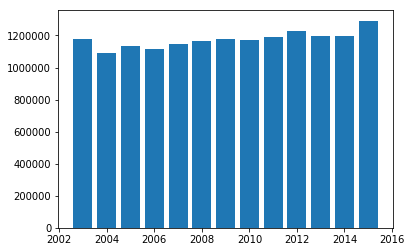

In [54]:
from matplotlib import pyplot
mp.pyplot.bar( italy_death['Year'], height=italy_death['total_death'])

## Question 3: What were the top five causes of death (top five ICD-10 terms) in Italy across all years for the Neoplasm ICD10-category (C00-D48)?

a Generate a table with the cause of death, the number of deaths, and the proportion of overall deaths.

In [124]:
italy_death2 = pdsql('select Cause, sum(Deaths1) as total_death, Year from italy_dath group by 1,3;')

In [122]:
neoplasem_deaths_italy = pdsql('select Year, Cause, total_death as Neoplasem_death from italy_death2 where Cause like "C%" or Cause like "DO%" or Cause like "D1%" or Cause like "D2%" or Cause like "D3%" or Cause like "D4%" or Cause like "D41%" or Cause like "D42%" or Cause like "D43%" or Cause like "D44%" or Cause like "D45%" or Cause like "D46%" or Cause like "D47%" or Cause like "D48%" group by 1, 2  order by 3 desc;')

In [135]:
# generate a table showing the proportion of deaths due to neoplasem by year 

deahts_proportion_neoplasem = pdsql('select a.*, b.total_death from neoplasem_deaths_italy a left outer join italy_death b on a.year = b.year order by Year ; ')


In [136]:
deahts_proportion_neoplasem['proportion_neoplasem_death']= deahts_proportion_neoplasem['Neoplasem_death']/deahts_proportion_neoplasem['total_death']
deahts_proportion_neoplasem['percentage_deaths_due_to_cancer'] = deahts_proportion_neoplasem['proportion_neoplasem_death'] * 100

display(deahts_proportion_neoplasem.head(5))

,Year,Cause,Neoplasem_death,total_death,proportion_neoplasem_death,percentage_deaths_due_to_cancer
0,2003,C349,31925,1177794,0.027106,2.710576
1,2003,C509,11566,1177794,0.009820,0.982005
2,2003,C169,10555,1177794,0.008962,0.896167
3,2003,C189,9706,1177794,0.008241,0.824083
4,2003,C259,7832,1177794,0.006650,0.664972


The top 5 neoplasems that casuded death in italy over all years were

In [144]:
top_5_neoplasems =pdsql('select distinct (Cause) as Cause, sum(Neoplasem_death) as death from deahts_proportion_neoplasem group by 1 order by 2 desc;')
display(top_5_neoplasems.head(5))

# C349 = Malignant neoplasm of unspecified part of bronchus or lung
# C509 = Malignant neoplasm of breast of unspecified site.
# C189 = Malignant neoplasm of colon
# C169 = Malignant neoplasm of stomach
# C259 = Malignant neoplasm of pancreas

,Cause,death
0,C349,426451
1,C509,155895
2,C189,143188
3,C169,125679
4,C259,120070


3b  Generate a pie chart to visualize the proportion of deaths.

I will present a pie chart showing cancer deaths as a proportiin of all deaths 


In [148]:
#Lets sum total cancer deaths by year 
cancer_prop_all = pdsql('select distinct(Year) as Year, sum(Neoplasem_death) as cancer_death, total_death from deahts_proportion_neoplasem group by 1 order by 1 ;' )

In [149]:
#now we caclualte proportion and percentage 

cancer_prop_all['proportion_cancer_death']= cancer_prop_all['cancer_death']/cancer_prop_all['total_death']
cancer_prop_all['percentage_cancer_death'] = cancer_prop_all['proportion_cancer_death'] * 100

display(cancer_prop_all)

,Year,cancer_death,total_death,proportion_cancer_death,percentage_cancer_death
0,2003,167140,1177794,0.141909,14.190937
1,2004,166439,1090102,0.152682,15.268204
2,2005,166542,1136656,0.146519,14.651926
3,2006,168662,1117228,0.150965,15.096471
4,2007,171623,1145762,0.149789,14.978940
5,2008,172781,1162940,0.148573,14.857258
6,2009,174677,1176876,0.148424,14.842430
7,2010,175044,1169230,0.149709,14.970878
8,2011,175972,1188306,0.148086,14.808644
9,2012,177348,1227040,0.144533,14.453319


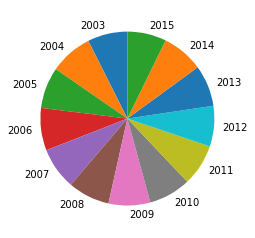

In [163]:
#Now we create pie charts
import matplotlib.pyplot as plt

# Plot
plt.pie(cancer_prop_all['percentage_cancer_death'], labels=cancer_prop_all['Year'],startangle=90)
plt.show()

## Question 4. Are there differences by age group for deaths from Neoplasms (C00-D48) in Australia for 2010? Identify the top five age groups in Australia dying with a Neoplasms cause of death.

In [175]:
##Create a dataset of all deaths due to cancer 
aust = pdsql('select Cause, Frmat as age_grp, sum(Deaths1) as deaths from death2 where Country = "5020" and Year= "2010" and  Cause like "C%" or Cause like "DO%" or Cause like "D1%" or Cause like "D2%" or Cause like "D3%" or Cause like "D4%" or Cause like "D41%" or Cause like "D42%" or Cause like "D43%" or Cause like "D44%" or Cause like "D45%" or Cause like "D46%" or Cause like "D47%" or Cause like "D48%" group by 1, 2 order by 3 desc;')


In [173]:
## age_grp 0 is death for all ages so we will not select it 
aust_drop_0 = pdsql('select * from aust where age_grp in("1","2","3","4","5","6","7","8","9");')

In [179]:
## findng which age group suffered the most death from cancer in 2010 
aust_age_death =pdsql('select age_grp as age_group, sum(deaths) as deaths from aust_drop_0 group by 1 order by 2 desc')

The below table shows the distribution of deaths due to neoplasems by age group. 
A cursory examination appears to indicate a difference in deaths by age group however, it is worth noting that coding of age groups is rather broad meaning that it is rather difficult to compare standardized mortality rates between groups. 




In [180]:
display(aust_age_death.head(5))

,age_group,deaths
0,1,25842
1,2,23946
2,4,664
3,3,37
4,6,2
